# Polynomial Regression (다항 회귀)

- 데이터를 표현함에 있어서 선형이 아닌 <U>곡선</U> 으로 나타나는 경우에 사용한다.
- 다항 회귀는 '항(차수, degree)'이 많다는 것.
<br> <br>
- 차수를 높이면 기존 모델보다 더 적은 오차를 만들어 낸다는 장점 ( $ R^2 $ 값 증가)
- 다항회귀는 1개의 독립 변수를 이용해 **차수(degree)** 를 높인다.
- feature에 대한 데이터를 변형시켜 다항으로 표현 ( $ W_1 * f + W_2 * f^2 + ... + b $ )

## 데이터 준비
- 다항 회귀를 이용해 농어의 길이 데이터를 이용해서 몸무게를 예측하기

In [2]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     ) # 농어 길이에 해당하는 값의 리스트 - np.array에 전달

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # 농어 무게에 해당하는 값의 리스트 - np.array에 전달

In [3]:
from sklearn.model_selection import train_test_split

train_d, test_d, train_t, test_t = train_test_split(perch_length, perch_weight, random_state = 42)

print(train_d.shape, test_d.shape)

(42,) (14,)


**머신러닝에서 column = target (y 값), row = feature data (X 값)으로 보기 때문에, target data (y)는 1차원 배열, feature data (X 값)는 2차원 배열을 가져야 한다. ```np.reshape(r, c)``` 사용해서 2차원 배열로 바꿔주자.**

In [4]:
train_d = train_d.reshape(-1, 1)
test_d = test_d.reshape(-1, 1)

print(train_d.shape, test_d.shape)

(42, 1) (14, 1)


## 모델학습

- 차수를 높일 때 특징으로 존재하는 독립변수를 제곱한 항을 데이터에 추가해야 한다.
- 지금의 경우에는 '길이'를 이용해 '무게'를 예측할 것이니까 '길이'를 제곱한 항을 추가해야 한다.
- ```np.column_stack(([a, b]))```: 두 개의 1차원 배열을 칼럼/세로/열 방향으로 붙여서 2차원 배열로 만드는 넘파이 기능


In [12]:
train_poly = np.column_stack((train_d**2, train_d))
test_poly = np.column_stack((test_d**2, test_d))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_t)
print(lr.score(train_poly, train_t))
print(lr.score(test_poly, test_t))

0.9706807451768623
0.9775935108325121


In [11]:
lr.predict([[50**2, 50]])

array([1573.98423528])

In [7]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


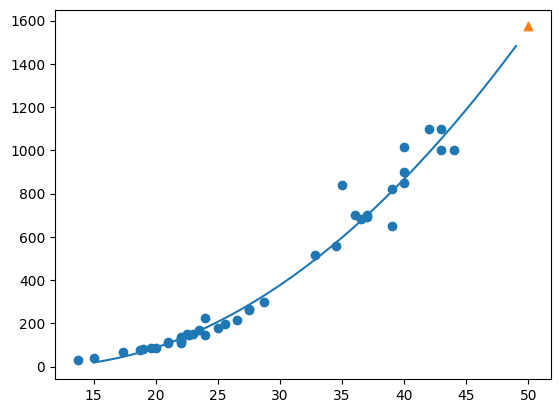

In [14]:
import matplotlib.pyplot as plt

point = np.arange(15, 50)
plt.scatter(train_d, train_t)
plt.plot(point, 1.01 * point**2 + (-21.6) * point + 116.05)
plt.scatter(50, 1573, marker = '^')
plt.show()

In [15]:
print(lr.score(train_poly, train_t))
print(lr.score(test_poly, test_t))
# 정확도가 선형회귀를 이용했을 때보다 더 높아졌다. 약간의 과소적합은 있음.

0.9706807451768623
0.9775935108325121


**위의 다항회귀 예시에서 생선의 길이라는 하나의 특징에 차수를 부여해 하나의 특징을 더 만들어냈다. 이처럼 차수가 1인 생선의 길이라는 단순한 특징을 제곱하여 또 다른 특징을 만들어 낼 수 있다.**
- 여러 특징이 있을 때 정확도 높아진다.
- 너무 많은 차수를 사용하면 overfitting 가능성 높아질 수 있다.
- overfitting 막으면서 차수를 적절히 조절할 수 있는 Ridge, Lasso라는 규제 클래스가 있다.

# Multiple Linear Regression (다중선형회귀)
- 독립변수가 여러개 (feature)

## 데이터 준비

In [1]:
import pandas as pd # pandas에서 feature 데이터를 불러오기

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
print(perch_full) # length, height, width of perch
# 세 가지 특징을 가지고 있어 다중선형회귀 구현 가능

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [2]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     ) # target(y) feature = weight

In [3]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

## Scikit Learn - Transformation

In [4]:
from sklearn.preprocessing import PolynomialFeatures
    # 데이터를 다항으로 나타내기 위해 PolynomialFeature() 클래스 호출
    # 데이터를 자동으로 다항식으로 변형시켜주는 클래스

poly = PolynomialFeatures() # 클래스 객체 정의
poly.fit([[2, 3]]) # 데이터 리스트를 2차원 형태로 입력해준다.

print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [5]:
poly = PolynomialFeatures(include_bias = False) # 클래스 객체 정의 (편향 포함 하지말란 의미)
poly.fit([[2, 3]]) # 데이터 리스트를 2차원 형태로 입력해준다.

print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


**PolynomialFeatures()를 이용하면 degree라는 매개변수로 최대 몇 차식까지 변형시킬지 설정할 수 있다. degree의 기본값은 2 이므로, 2의 제곱, 3의 제곱, 그리고 서로를 곱한 값으로 변형된 것을 확인할 수 있다.**

In [6]:
poly = PolynomialFeatures(degree = 3, include_bias = False) # 3차식으로 표현하겠다는 의미 (편향 포함 하지말란 의미)

poly.fit([[2, 3]]) # 데이터 리스트를 2차원 형태로 입력해준다.
print(poly.transform([[2, 3]]))
    # print(poly.fit_transform([[2, 3]]))
    # fit() + transform() 훈련 + 변형 한 번에 할 수 있음

[[ 2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [7]:
poly = PolynomialFeatures(include_bias = False)

train_poly = poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [8]:
print(test_poly.shape)
print(train_poly.shape)

(14, 9)
(42, 9)


## 다중 회귀 모델 훈련하기

In [9]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # 모델 객체 정의 
lr.fit(train_poly, train_target) # 모델 학습
lr.score(train_poly, train_target) # 정확도 확인


0.9903183436982124

In [10]:
lr.score(test_poly, test_target)

0.971455991159406

**정확도 상승, 과대적합 어느정도 해결. degree 높이면 정확도가 더 높아지지 않을까?**

In [11]:
poly = PolynomialFeatures(degree = 5, include_bias = False) # PolynomialFeatures() 클래스 객체 정의, 차수 = 5, bias 제외

train_poly = poly.fit_transform(train_input) # 학습 + 변형
test_poly = poly.transform(test_input)
print(train_poly.shape) # 형태
print(test_poly.shape)

(42, 55)
(14, 55)


In [12]:
lr.fit(train_poly, train_target) # 변형 데이터 학습
print(lr.score(train_poly, train_target))# 변형 데이터 정확도 확인
print(lr.score(test_poly, test_target))

0.9999999999998099
-144.40606225090627


**결과는 그렇지 않다. 왜냠 특성이 적절하게 많으면 정확도가 올라가지만 특성이 과하게 많으면 과대적합이 발생할 수 있기 때문이다. 규제(regularization)을 통해 과대적합을 방지할 수 있다.**

# Regularization
- overfitting 막을 수 있도록 모델의 Parameter를 조정하는 것
<br><br>
- **Ridge**: 변형된 데이터 변수 모두 사용하되, 계수를 줄이는 방식 사용
- **Lasso**: 일정 변수들의 계수를 0으로 만들어 사용하지 않는 방식 사용. 데이터 손실로 정확도가 떨어지는 위험성 존재.

In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(train_poly)
train_scaled = scale.transform(train_poly)
test_scaled = scale.transform(test_poly)

**각 데이터의 범위 차이때문에 정확도 떨어질 수 있다. 따라서 각 데이터들을 표준점수로 변환해 비슷한 범위 내에서 데이터를 처리할 수 있도록 StandardScaler() 사용.**

## Ridge (릿지)

- 변형된 데이터 변수 모두 사용, 계수를 줄이는 방식
- Ridge() 클래스에는 ```alpha (0.001~100)```라는 매개변수를 통해 변수의 계수를 조절할 수 있는 Hyper Parameter가 존재한다.

In [15]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(train_scaled, train_target)
print(rid.score(train_scaled, train_target))
print(rid.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615391


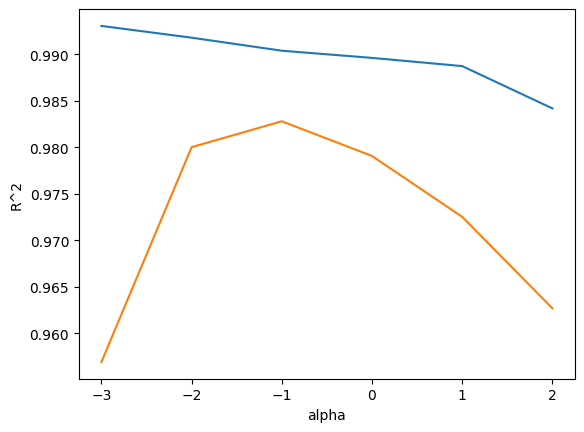

In [18]:
# 0.001 ~ 100 값을 조절하며 최적의 alpha 값을 찾기

import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:
    rid = Ridge(alpha = alpha)
    rid.fit(train_scaled, train_target)
    train_score.append(rid.score(train_scaled, train_target))
    test_score.append(rid.score(test_scaled, test_target))


plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

**최적의 alpha값은 0.1**

In [19]:
rid = Ridge(alpha = 0.1)
rid.fit(train_scaled, train_target)

print(rid.score(train_scaled, train_target))
print(rid.score(test_scaled, test_target))


0.9903815817570367
0.9827976465386918


## Lasso (라쏘)

In [20]:
from sklearn.linear_model import Lasso

las = Lasso()
las.fit(train_scaled, train_target)
print(las.score(train_scaled, train_target))
print(las.score(test_scaled, test_target))

0.989789897208096
0.9800593698421884


/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/Users/minkim/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


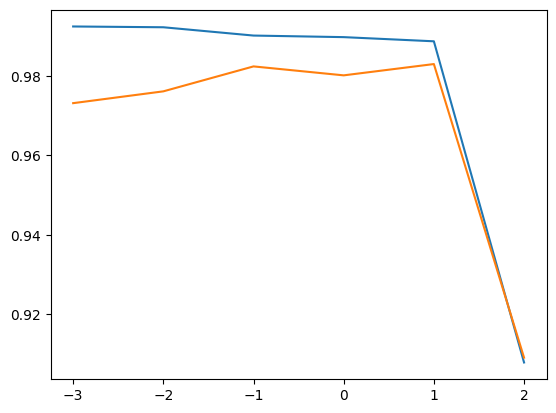

In [23]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alp in alpha_list:
    las = Lasso(alpha = alp, max_iter = 10000)
    las.fit(train_scaled, train_target)
    train_score.append(las.score(train_scaled, train_target))
    test_score.append(las.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

**최적의 alpha값은 10**

In [24]:
las = Lasso(alpha = 10)
las.fit(train_scaled, train_target)
print(las.score(train_scaled, train_target))
print(las.score(test_scaled, test_target))

0.9888067471131866
0.9824470598706695


**사용되지 않은 계수가 몇개인지 알기**

In [25]:
print(np.sum(las.coef_ == 0))

40
